In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [53]:
image = cv2.imread('fauziuts.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
none_image = np.zeros_like(image)

In [55]:
lower_blue = np.array([100,150,0])
upper_blue = np.array([140,255,255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
blue = cv2.bitwise_and(image, image, mask=mask_blue)

In [57]:
lower_red1 = np.array([0,150,0])
upper_red1 = np.array([10,255,255])
lower_red2 = np.array([160,150,0])
upper_red2 = np.array([180,255,255])
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

In [59]:
mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)
red_blue = cv2.bitwise_and(image, image, mask=mask_red_blue)

In [61]:
lower_green = np.array([40,150,0])
upper_green = np.array([70,255,255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

In [63]:
mask_rgb = cv2.bitwise_or(mask_red_blue, mask_green)
rgb = cv2.bitwise_and(image, image, mask=mask_rgb)

In [65]:
none_rgb = cv2.cvtColor(none_image, cv2.COLOR_BGR2RGB)
blue_rgb = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)
red_blue_rgb = cv2.cvtColor(red_blue, cv2.COLOR_BGR2RGB)
rgb_rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [67]:
def compute_histogram(mask):
    masked_img = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
    hist_r = cv2.calcHist([masked_img], [0], mask, [256], [0, 256])
    hist_g = cv2.calcHist([masked_img], [1], mask, [256], [0, 256])
    hist_b = cv2.calcHist([masked_img], [2], mask, [256], [0, 256])
    return hist_r, hist_g, hist_b

In [69]:
hist_r_blue, hist_g_blue, hist_b_blue = compute_histogram(mask_blue)
hist_r_rb, hist_g_rb, hist_b_rb = compute_histogram(mask_red_blue)
hist_r_rgb, hist_g_rgb, hist_b_rgb = compute_histogram(mask_rgb)

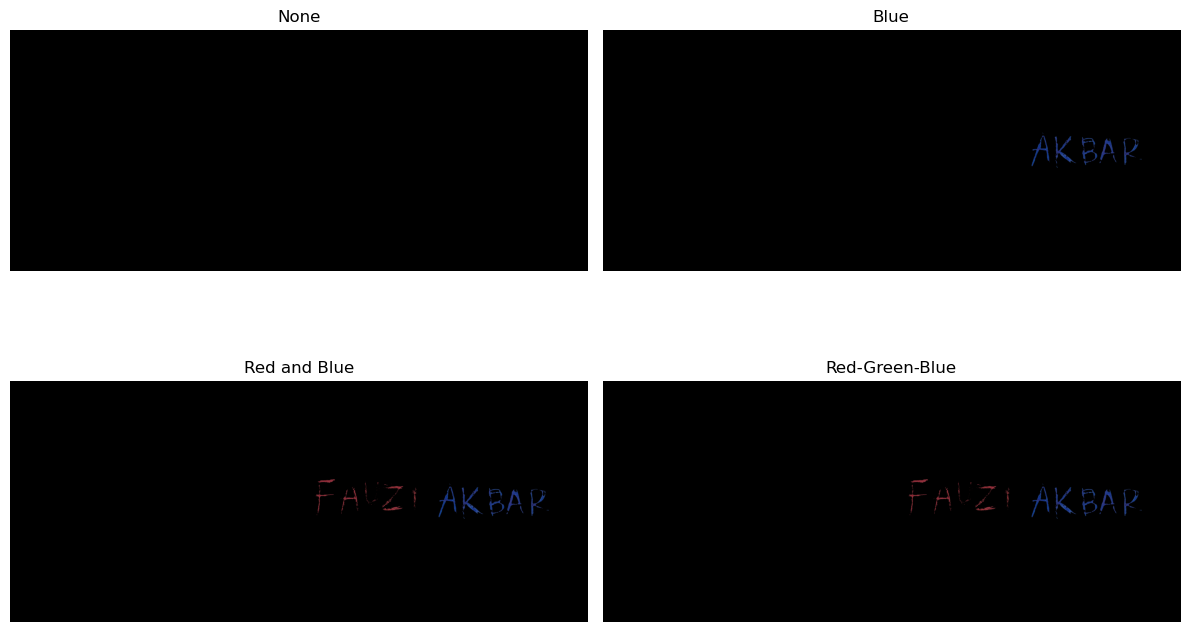

In [71]:
fig1, axs1 = plt.subplots(2, 2, figsize=(12, 8))

axs1[0,0].imshow(none_rgb)
axs1[0,0].set_title('None')
axs1[0,0].axis('off')

axs1[0,1].imshow(blue_rgb)
axs1[0,1].set_title('Blue')
axs1[0,1].axis('off')

axs1[1,0].imshow(red_blue_rgb)
axs1[1,0].set_title('Red and Blue')
axs1[1,0].axis('off')

axs1[1,1].imshow(rgb_rgb)
axs1[1,1].set_title('Red-Green-Blue')
axs1[1,1].axis('off')

plt.tight_layout()
plt.show()

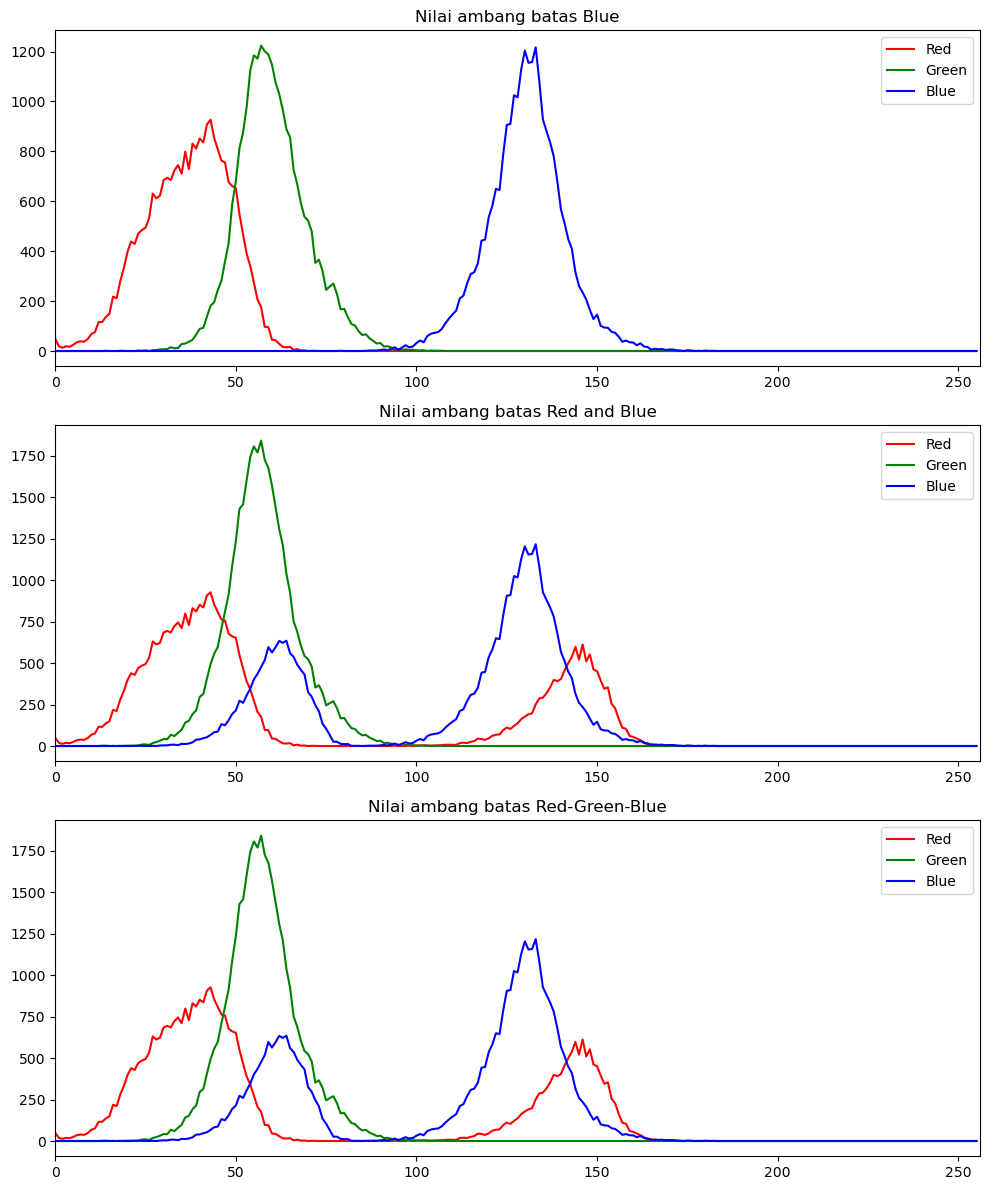

In [77]:
fig2, axs2 = plt.subplots(3, 1, figsize=(10, 12))

axs2[0].plot(hist_r_blue, color='red', label='Red')
axs2[0].plot(hist_g_blue, color='green', label='Green')
axs2[0].plot(hist_b_blue, color='blue', label='Blue')
axs2[0].set_title('Nilai ambang batas Blue')
axs2[0].set_xlim([0, 256])
axs2[0].legend()

axs2[1].plot(hist_r_rb, color='red', label='Red')
axs2[1].plot(hist_g_rb, color='green', label='Green')
axs2[1].plot(hist_b_rb, color='blue', label='Blue')
axs2[1].set_title('Nilai ambang batas Red and Blue')
axs2[1].set_xlim([0, 256])
axs2[1].legend()

axs2[2].plot(hist_r_rgb, color='red', label='Red')
axs2[2].plot(hist_g_rgb, color='green', label='Green')
axs2[2].plot(hist_b_rgb, color='blue', label='Blue')
axs2[2].set_title('Nilai ambang batas Red-Green-Blue')
axs2[2].set_xlim([0, 256])
axs2[2].legend()

plt.tight_layout()
plt.show()